In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Plan ##
- Determine key drivers of attrition.
- Hypothesis:
    - Distance from work will impact attrition rates.
    - Salary impacts attrition.
        - Explore salary per department.
    - Employees with more years at the company will continue to stay.
        - Determine dropping off point for those that leave.
    - Age impacts attrition.

- Deliver to HR manager via Tableau dashboard.    

## Acquire ##

In [2]:
df = pd.read_csv("HR.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Prepare ###
- Initial look at data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Explore ##

### Understanding Attrition ###

In [7]:
df.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

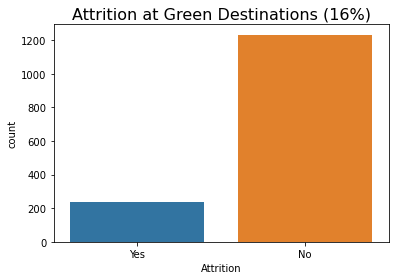

In [8]:
sns.countplot(data=df, x=df.Attrition)
plt.title('Attrition at Green Destinations (16%)', fontsize=16)
plt.show()

### Does distance from home impact attrition rates? ###

<AxesSubplot:>

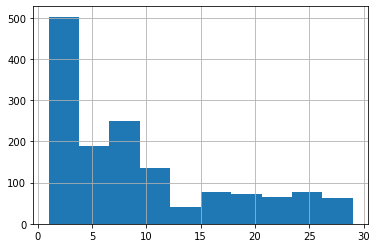

In [9]:
df.DistanceFromHome.hist()

**Notes:** The majority of employees live less than 10 miles away from work.

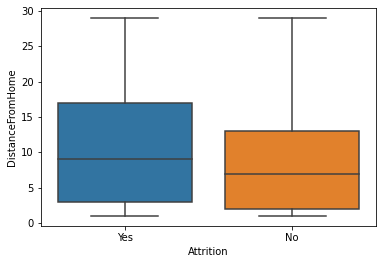

In [10]:
sns.boxplot(data = df, x = 'Attrition', y = 'DistanceFromHome')
plt.show()

**Notes:** Employees that leave the company have a higher median distance from home.
- Let's bin to see if there is a relationship throughout each group of commuting distance.

In [11]:
df.loc[df['DistanceFromHome'].between(0, 10, 'both'), 'Commute'] = 'Group_1'
df.loc[df['DistanceFromHome'].between(11, 20, 'both'), 'Commute'] = 'Group_2'
df.loc[df['DistanceFromHome'].between(21, 30, 'both'), 'Commute'] = 'Group_3'

In [12]:
df.Commute.value_counts()

Group_1    1026
Group_2     240
Group_3     204
Name: Commute, dtype: int64

In [13]:
Group_1= df[df.Commute=='Group_1']
Group_2= df[df.Commute=='Group_2']
Group_3= df[df.Commute=='Group_3']

In [14]:
Group_1.Attrition.value_counts(normalize=True)

No     0.859649
Yes    0.140351
Name: Attrition, dtype: float64

In [15]:
Group_2.Attrition.value_counts(normalize=True)

No     0.8
Yes    0.2
Name: Attrition, dtype: float64

In [16]:
Group_3.Attrition.value_counts(normalize=True)

No     0.779412
Yes    0.220588
Name: Attrition, dtype: float64

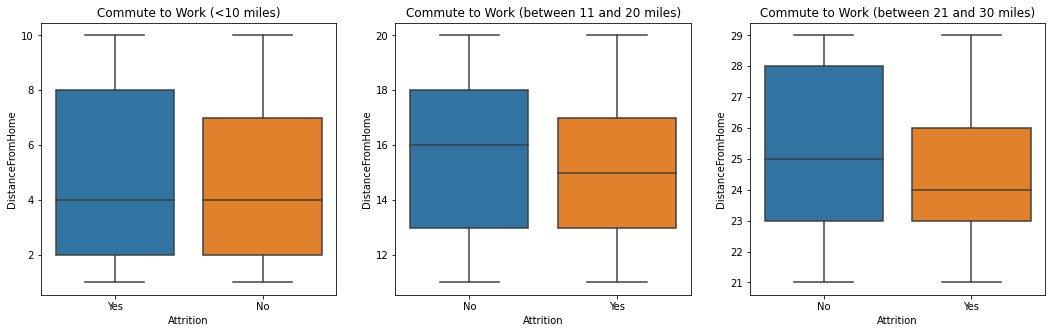

In [17]:
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.boxplot(data = Group_1, x = 'Attrition', y = 'DistanceFromHome')
plt.title('Commute to Work (<10 miles)')

plt.subplot(132)
sns.boxplot(data = Group_2, x = 'Attrition', y = 'DistanceFromHome')
plt.title('Commute to Work (between 11 and 20 miles)')

plt.subplot(133)
sns.boxplot(data = Group_3, x = 'Attrition', y = 'DistanceFromHome')
plt.title('Commute to Work (between 21 and 30 miles)')
plt.show()

***Reminder:*** Fix x axis to order Yes and No.

#### Perform Hypothesis Testing to Determine Statistical Significance between Attrition and Distance from Home ####
- Null Hypothesis: The mean distance from home for employees that leave <= the mean distance from home of all employees.
- Alternative Hypothesis: The mean distance from home for employees that leave > the mean distance from home of all employees.

**T-test for those that leave versus the overall population in relation to distance from home.**

In [18]:
alpha = .05
- Perform chi squared testing to determine if the categorical groups of commute distance is related to attrition.
    - Null Hypothesis: There is no relationship between commute and attrition.
    - Alternative Hypothesis: There is a relationship between commute and attrition. 

In [19]:
t, p = stats.ttest_1samp(sample, overall_mean)
print(t, p/2)

if p/2 > alpha:
    print("We fail to reject the Null Hypothesis.")
elif t < 0:
    print("We fail to reject the Null Hypothesis.")
else:
    print("We reject the Null Hypothesis.")

2.6234277922535685 0.004636165811109839 0.05
We reject the Null Hypothesis


**Notes:** We reject the Null Hypothesis. Employees that leave have a further drive to work than the overall population.


In [32]:
sample1 = Group_1[Group_1.Attrition == 'Yes'].DistanceFromHome
overall_mean1 = Group_1.DistanceFromHome.mean()
sample2 = Group_2[Group_2.Attrition == 'Yes'].DistanceFromHome
overall_mean2 = Group_2.DistanceFromHome.mean()
sample3 = Group_3[Group_3.Attrition == 'Yes'].DistanceFromHome
overall_mean3 = Group_3.DistanceFromHome.mean()

In [33]:
t, p = stats.ttest_1samp(sample1, overall_mean1)
print(t, p/2)

if p/2 > alpha:
    print("We fail to reject the Null Hypothesis.")
elif t < 0:
    print("We fail to reject the Null Hypothesis.")
else:
    print("We reject the Null Hypothesis.")

0.674442756909248 0.25055936993562233
We fail to reject the Null Hypothesis.


In [34]:
t, p = stats.ttest_1samp(sample2, overall_mean2)
print(t, p/2)

if p/2 > alpha:
    print("We fail to reject the Null Hypothesis.")
elif t < 0:
    print("We fail to reject the Null Hypothesis.")
else:
    print("We reject the Null Hypothesis.")

-0.7673364137763453 0.2233596526796871
We fail to reject the Null Hypothesis.


In [35]:
t, p = stats.ttest_1samp(sample3, overall_mean3)
print(t, p/2)

if p/2 > alpha:
    print("We fail to reject the Null Hypothesis.")
elif t < 0:
    print("We fail to reject the Null Hypothesis.")
else:
    print("We reject the Null Hypothesis.")

-1.2947236847222552 0.10108444525792615
We fail to reject the Null Hypothesis.


**Notes:** While there is statistical significance between distance from home within the entire population, within the binned distance groups, we fail to reject the null hypothesis.

**Perform chi squared testing to determine if the categorical groups of commute distance is related to attrition.**
   - Null Hypothesis: There is no relationship between commute and attrition.
   - Alternative Hypothesis: There is a relationship between commute and attrition. 

In [24]:
observed = pd.crosstab(df.Attrition, df.Commute)
observed

Commute,Group_1,Group_2,Group_3
Attrition,,,
No,882,192,159
Yes,144,48,45


In [25]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(11.290244745952961, 0.0035347158209561237)

**Notes:** We reject the null hypothesis. There is a relationship between commute and attrition.

### Does monthly income impact attrition? ###

In [37]:
df.MonthlyIncome.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

**Monthly income has a substantial range with an average of $6.5k per month**

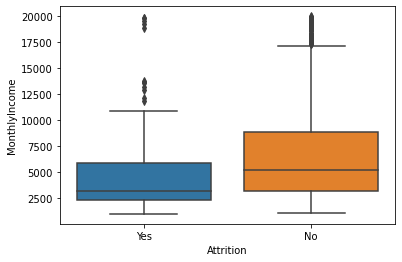

In [46]:
sns.boxplot(x = df.Attrition, y = df.MonthlyIncome)
plt.show()

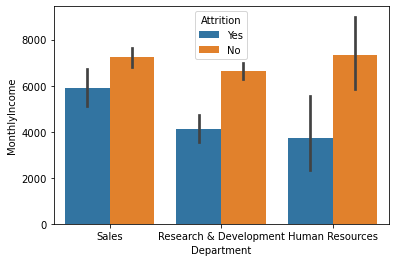

In [49]:
sns.barplot(x = df.Department, y = df.MonthlyIncome, hue = df.Attrition)
plt.show()